In [220]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import seaborn as sns

In [145]:
results = pd.read_csv('results.csv')
#results = results.query("simp_algorithm == ['OS','RDP','VW','BU_1', 'BU_2']")
results = results.query("simp_algorithm == ['OS','RDP','VW','BU_1', 'BU']")
results.loc[results['simp_algorithm'] == 'BU_1', 'simp_algorithm'] = 'BU'

results["dataset"] = results["dataset"].apply(lambda x: x.replace("TEST_normalized", ""))
results["model"] = results["model"].apply(lambda x: x.split(".")[0].replace("_norm", ""))
results.head(5)

,dataset,model,simp_algorithm,performance,comp@loy=0.8,num_segm@loy=0.8,time
0,Adiac,cnn,OS,0.917075,0.0903560214964461,20.734278,0.000000
1,Adiac,cnn,RDP,0.829347,0.0944560291671442,2.060606,0.000000
2,Adiac,cnn,VW,0.870908,0.106135063164992,8.733547,0.000000
3,Adiac,cnn,BU,0.822399,0.0895194486965223,4.987528,0.000000
5,BME,decision-tree,OS,0.890280,"(0.16259842519685042, 1.0)",NaN,100.754173


In [146]:
datasets_paths = [dir for dir in os.listdir('.') if os.path.isdir(dir)]
models_paths = [os.path.join(dir, 'models.csv') for dir in datasets_paths if os.path.isfile(os.path.join(dir, 'models.csv'))]
datasets_models = dict(zip(datasets_paths, models_paths))
datasets_models = {dataset: pd.read_csv(path) for dataset, path in datasets_models.items()}

models_df = pd.DataFrame()
for dataset, models in datasets_models.items():
    models['dataset'] = dataset
    models_df = pd.concat([models_df, models], ignore_index=True)

#models_df["train_acc"] = models_df["train_acc"].astype(float)
#models_df["val_acc"] = models_df["val_acc"].astype(float)
#models_df["test_acc"] = models_df["test_acc"].astype(float)
print(models_df.head(6))


            model_type  train_acc   val_acc  test_acc  \
0        decision-tree   1.000000  0.583333  0.668966   
1  logistic-regression   0.681462  0.625000  0.593103   
2                  cnn   0.940313  0.977188  1.000000   
3                  cnn   0.922742  0.964063  1.000000   
4           miniRocket   1.000000  0.822917  0.827586   
5           miniRocket   1.000000  1.000000  0.937241   

                       dataset  
0  MiddlePhalanxOutlineCorrect  
1  MiddlePhalanxOutlineCorrect  
2  MiddlePhalanxOutlineCorrect  
3  MiddlePhalanxOutlineCorrect  
4  MiddlePhalanxOutlineCorrect  
5                      FaceAll  


In [218]:
metadata = pd.read_csv("../data/DataSummary.csv")
metadata = metadata.rename(columns={"Name": "dataset"})
metadata = metadata.drop("Data donor/editor", axis=1)
print(metadata.head(5))


   ID       Type                       dataset  Train   Test   Class  Length  \
0   1      Image                         Adiac     390    391     37     176   
1  90  Simulated                           BME      30    150      3     128   
2   7  Simulated                           CBF      30    900      3     128   
3  91    Traffic                     Chinatown      20    343      2      24   
4  16      Image  DistalPhalanxOutlineAgeGroup     400    139      3      80   

   ED (w=0) DTW (learned_w)   DTW (w=100)  Default rate Stationary  Seasonal  \
0    0.3887       0.3913 (3)       0.3964        0.9591       True      True   
1    0.1667       0.0200 (4)       0.1000        0.6667      False      True   
2    0.1478      0.0044 (11)       0.0033        0.6644      False     False   
3    0.0466       0.0466 (0)       0.0437        0.2741      False     False   
4    0.3741       0.3741 (0)       0.2302        0.5324      False     False   

    Entropy  
0  0.267802  
1  0.11614

## All Results

In [148]:
datasets = [dataset.replace("TEST_normalized", "") for dataset in results['dataset'].unique()]
print(f"List of all Datasets {' '.join(datasets)}")
print(f"List of all Datasets {datasets}")
print(f"Number of Datasets: {len(results['dataset'].unique())}")
print(results['model'].unique())
print(len(results['model'].unique()))
print(results['simp_algorithm'].unique())
print(len(results['simp_algorithm'].unique()))

List of all Datasets Adiac BME CBF Chinatown DistalPhalanxOutlineAgeGroup DistalPhalanxOutlineCorrect DistalPhalanxTW ECG200 ElectricDevices FacesUCR GunPointAgeSpan GunPointOldVersusYoung ItalyPowerDemand MedicalImages MiddlePhalanxOutlineAgeGroup MiddlePhalanxOutlineCorrect MiddlePhalanxTW PhalangesOutlinesCorrect Plane ProximalPhalanxOutlineAgeGroup ProximalPhalanxOutlineCorrect ProximalPhalanxTW SmoothSubspace SonyAIBORobotSurface1 SwedishLeaf TwoLeadECG TwoPatterns UMD ChinatownTEST Crop ECG5000 ECGFiveDays FaceAll GunPoint GunPointMaleVersusFemale MoteStrain PowerCons SonyAIBORobotSurface2 Wafer
List of all Datasets ['Adiac', 'BME', 'CBF', 'Chinatown', 'DistalPhalanxOutlineAgeGroup', 'DistalPhalanxOutlineCorrect', 'DistalPhalanxTW', 'ECG200', 'ElectricDevices', 'FacesUCR', 'GunPointAgeSpan', 'GunPointOldVersusYoung', 'ItalyPowerDemand', 'MedicalImages', 'MiddlePhalanxOutlineAgeGroup', 'MiddlePhalanxOutlineCorrect', 'MiddlePhalanxTW', 'PhalangesOutlinesCorrect', 'Plane', 'Proximal

#### Sum AULC

In [149]:
os_alg_sum_all = results.query('simp_algorithm == "OS"')["performance"].sum()
rdp_alg_sum_all = results.query('simp_algorithm == "RDP"')["performance"].sum()
bu_alg_sum_all = results.query('simp_algorithm == "BU"')["performance"].sum()
#bu_2_alg_sum_all = results.query('simp_algorithm == "BU_2"')["performance"].sum()
vw_alg_sum_all = results.query('simp_algorithm == "VW"')["performance"].sum()
print("Sum of AULC per algorithm")
print("OS: ", os_alg_sum_all)
print("RDP: ", rdp_alg_sum_all)
print("BU: ", bu_alg_sum_all)
#print("BU_2: ", bu_2_alg_sum_all)
print("VW: ", vw_alg_sum_all)

Sum of AULC per algorithm
OS:  99.49417106992249
RDP:  99.89448145323473
BU:  99.7332549972759
VW:  94.25853008178251


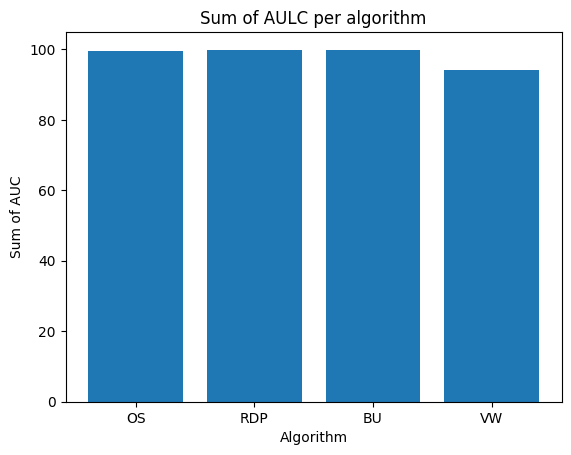

In [181]:
sum_auc = [os_alg_sum_all, rdp_alg_sum_all, bu_alg_sum_all, vw_alg_sum_all]
plt.bar(['OS', 'RDP', 'BU', 'VW'],sum_auc)
plt.title('Sum of AULC per algorithm')
plt.xlabel('Algorithm')
plt.ylabel('Sum of AUC')
plt.show()

#### Mean AULC

In [182]:
os_alg_mean_all = results.query('simp_algorithm == "OS"')["performance"].mean()
rdp_alg_mean_all = results.query('simp_algorithm == "RDP"')["performance"].mean()
bu_alg_mean_all = results.query('simp_algorithm == "BU"')["performance"].mean()
#bu_2_alg_mean_all = results.query('simp_algorithm == "BU_2"')["performance"].mean()
vw_alg_mean_all = results.query('simp_algorithm == "VW"')["performance"].mean()
print("Mean of AULC per algorithm")
print("OS: ", os_alg_mean_all)
print("RDP: ", rdp_alg_mean_all)
print("BU: ", bu_alg_mean_all)
#print("BU_2: ", bu_2_alg_mean_all)
print("VW: ", vw_alg_mean_all)

Mean of AULC per algorithm
OS:  0.8883408131243079
RDP:  0.8762673811687257
BU:  0.8672456956284862
VW:  0.8268292112437062


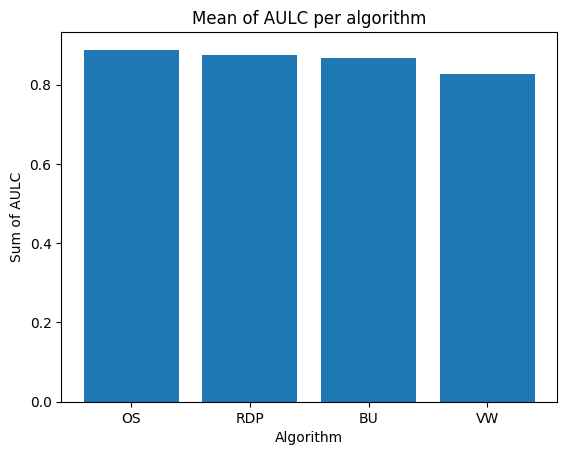

In [183]:
#sum_auc = [os_alg_mean_all, rdp_alg_mean_all, bu_alg_mean_all, bu_2_alg_mean_all, vw_alg_mean_all]
sum_auc = [os_alg_mean_all, rdp_alg_mean_all, bu_alg_mean_all, vw_alg_mean_all]

plt.bar(['OS', 'RDP', 'BU', 'VW'], sum_auc)
plt.title('Mean of AULC per algorithm')
plt.xlabel('Algorithm')
plt.ylabel('Sum of AULC')
plt.show()

#### Mean AULC Per Alg and Model

In [184]:
os_alg_all_per_model = results.query('simp_algorithm == "OS"').groupby("model")["performance"].mean()
rdp_alg_all_per_model = results.query('simp_algorithm == "RDP"').groupby("model")["performance"].mean()
bu_alg_all_per_model = results.query('simp_algorithm == "BU"').groupby("model")["performance"].mean()
#bu_2_alg_all_per_model = results.query('simp_algorithm == "BU_2"').groupby("model")["performance"].mean()
vw_alg_all_per_model = results.query('simp_algorithm == "VW"').groupby("model")["performance"].mean()
print("Mean of AUC per algorithm and model")
print("OS: ", os_alg_all_per_model)
print("RDP: ", rdp_alg_all_per_model)
print("BU: ", bu_alg_all_per_model)
#print("BU_2: ", bu_2_alg_all_per_model)
print("VW: ", vw_alg_all_per_model)

Mean of AUC per algorithm and model
OS:  model
cnn                    0.881757
decision-tree          0.890280
knn                    0.890280
logistic-regression    0.890280
miniRocket             0.890830
Name: performance, dtype: float64
RDP:  model
cnn                    0.870322
decision-tree          0.887694
knn                    0.887694
logistic-regression    0.887694
miniRocket             0.866765
Name: performance, dtype: float64
BU:  model
cnn                    0.885280
decision-tree          0.914798
knn                    0.914798
logistic-regression    0.914798
miniRocket             0.796528
Name: performance, dtype: float64
VW:  model
cnn                    0.845859
decision-tree          0.796375
knn                    0.796375
logistic-regression    0.796375
miniRocket             0.849868
Name: performance, dtype: float64


/tmp/ipykernel_6208/4251764101.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0, 0].set_xticklabels(os_alg_all_per_model.index, rotation=10)
/tmp/ipykernel_6208/4251764101.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0, 1].set_xticklabels(os_alg_all_per_model.index, rotation=10)
/tmp/ipykernel_6208/4251764101.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1, 0].set_xticklabels(bu_alg_all_per_model.index, rotation=10)
/tmp/ipykernel_6208/4251764101.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1, 1].set_xticklabels(vw_alg_all_per_model.index, rotation=10)


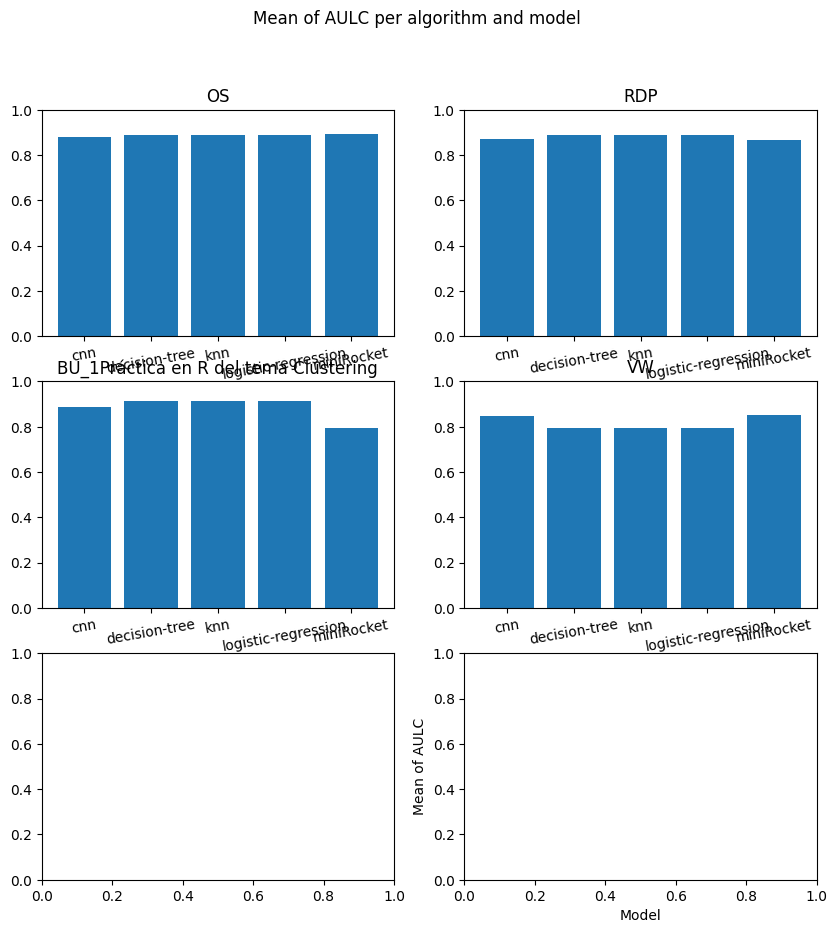

In [154]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))
ax[0, 0].bar(os_alg_all_per_model.index, os_alg_all_per_model.values)
ax[0, 0].set_title('OS')
ax[0, 0].set_xticklabels(os_alg_all_per_model.index, rotation=10)
ax[0, 0].set_ylim(0, 1)

ax[0, 1].bar(rdp_alg_all_per_model.index, rdp_alg_all_per_model.values)
ax[0, 1].set_xticklabels(os_alg_all_per_model.index, rotation=10)
ax[0, 1].set_title('RDP')
ax[0, 1].set_ylim(0, 1)

ax[1, 0].bar(bu_alg_all_per_model.index, bu_alg_all_per_model.values)
ax[1, 0].set_xticklabels(bu_alg_all_per_model.index, rotation=10)
ax[1, 0].set_title('BU_1Práctica en R del tema Clustering')
ax[1, 0].set_ylim(0, 1)

ax[1, 1].bar(vw_alg_all_per_model.index, vw_alg_all_per_model.values)
ax[1, 1].set_xticklabels(vw_alg_all_per_model.index, rotation=10)
ax[1, 1].set_title('VW')
ax[1, 1].set_ylim(0, 1)
"""
ax[2, 0].bar(bu_2_alg_all_per_model.index, bu_2_alg_all_per_model.values)
ax[2, 0].set_xticklabels(bu_alg_all_per_model.index, rotation=10)
ax[2, 0].set_title('BU_1')
ax[2, 0].set_ylim(0, 1)
"""
plt.suptitle('Mean of AULC per algorithm and model')
plt.xlabel('Model')
plt.ylabel('Mean of AULC')
plt.show()


## Model Performance

In [155]:
#Perfromance of models
models_mean_perf_train = models_df.groupby("model_type")["train_acc"].mean()
models_mean_perf_train

model_type
cnn                    0.901954
decision-tree          0.649734
knn                    0.999547
logistic-regression    0.546890
miniRocket             0.998002
Name: train_acc, dtype: float64

#### Train Accuracy

Text(0, 0.5, 'Mean of Train Accuracy')

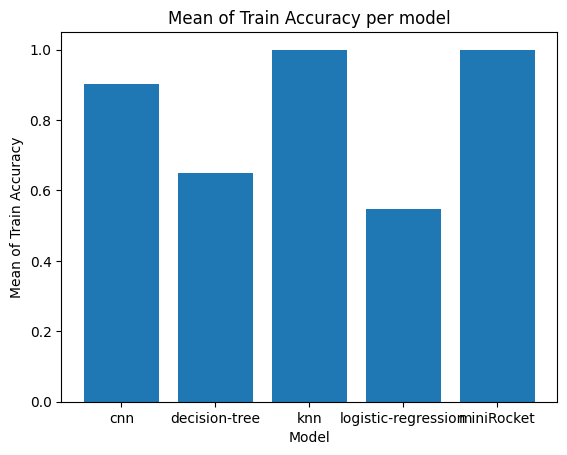

In [156]:
plt.bar(models_mean_perf_train.index, models_mean_perf_train.values) #type: ignore 
plt.title('Mean of Train Accuracy per model')
plt.xlabel('Model')
plt.ylabel('Mean of Train Accuracy')

#### Validation Accuracy

In [157]:
models_mean_perf_val = models_df.groupby("model_type")["val_acc"].mean()
models_mean_perf_val

model_type
cnn                    0.724332
decision-tree          0.452748
knn                    0.648964
logistic-regression    0.467873
miniRocket             0.779368
Name: val_acc, dtype: float64

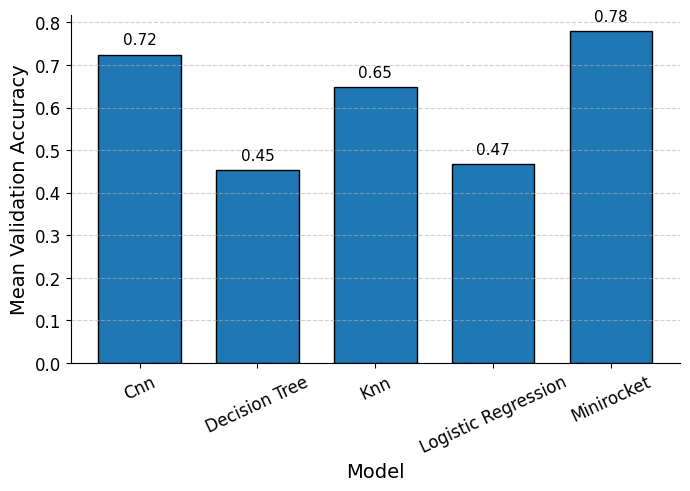

In [158]:
fig, ax = plt.subplots(figsize=(7, 5))

bars = ax.bar([m.replace("-", " ").title() for m in models_mean_perf_val.index], models_mean_perf_val.values, color='C0', edgecolor='black', width=0.7)
ax.set_xlabel('Model', fontsize=14)
ax.set_ylabel('Mean Validation Accuracy', fontsize=14)

ax.tick_params(axis='x', rotation=25, labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.6)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

for bar in bars:
    height = bar.get_height()
    ax.annotate(f"{height:.2f}", xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0, 5), textcoords="offset points",
                ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.savefig("../plots/validation_perf.png")
plt.show()

Test Accuracy

In [159]:
models_mean_perf_test = models_df.groupby("model_type")["test_acc"].mean()
models_mean_perf_test

model_type
cnn                    0.773781
decision-tree          0.494429
knn                    0.706363
logistic-regression    0.514192
miniRocket             0.883471
Name: test_acc, dtype: float64

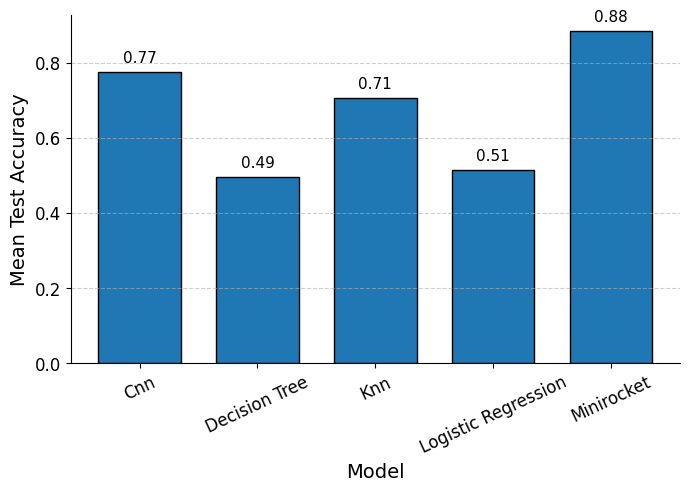

In [160]:
fig, ax = plt.subplots(figsize=(7, 5))

bars = ax.bar([m.replace("-", " ").title() for m in models_mean_perf_test.index], models_mean_perf_test.values, color='C0', edgecolor='black', width=0.7)
ax.set_xlabel('Model', fontsize=14)
ax.set_ylabel('Mean Test Accuracy', fontsize=14)

ax.tick_params(axis='x', rotation=25, labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.6)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

for bar in bars:
    height = bar.get_height()
    ax.annotate(f"{height:.2f}", xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0, 5), textcoords="offset points",
                ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.savefig("../plots/test_perf.png")
plt.show()

### By Class

In [161]:
dataset_class = metadata[["dataset", "Class"]].to_dict()
dataset_class_dict = pd.Series(metadata["Class"].values, index=metadata["dataset"].values).to_dict()
print(dataset_class_dict)
#models_df["class"] = models_df["dataset"].map()

{'Adiac': 37, 'BME': 3, 'CBF': 3, 'Chinatown': 2, 'DistalPhalanxOutlineAgeGroup': 3, 'DistalPhalanxOutlineCorrect': 2, 'DistalPhalanxTW': 6, 'ECG200': 2, 'ElectricDevices': 7, 'FacesUCR': 14, 'GunPointAgeSpan': 2, 'GunPointMaleVersusFemale': 2, 'GunPointOldVersusYoung': 2, 'ItalyPowerDemand': 2, 'MedicalImages': 10, 'MiddlePhalanxOutlineAgeGroup': 3, 'MiddlePhalanxOutlineCorrect': 2, 'MiddlePhalanxTW': 6, 'PhalangesOutlinesCorrect': 2, 'ProximalPhalanxOutlineAgeGroup': 3, 'ProximalPhalanxOutlineCorrect': 2, 'ProximalPhalanxTW': 6, 'SmoothSubspace': 3, 'SonyAIBORobotSurface1': 2, 'SwedishLeaf': 15, 'TwoLeadECG': 2, 'TwoPatterns': 4, 'UMD': 3}


In [162]:
models_class_df = models_df
models_class_df["class"] = models_class_df["dataset"].map(dataset_class_dict)
models_class_df

,model_type,train_acc,val_acc,test_acc,dataset,class
0,decision-tree,1.000000,0.583333,0.668966,MiddlePhalanxOutlineCorrect,2.0
1,logistic-regression,0.681462,0.625000,0.593103,MiddlePhalanxOutlineCorrect,2.0
2,cnn,0.940313,0.977188,1.000000,MiddlePhalanxOutlineCorrect,2.0
3,cnn,0.922742,0.964063,1.000000,MiddlePhalanxOutlineCorrect,2.0
4,miniRocket,1.000000,0.822917,0.827586,MiddlePhalanxOutlineCorrect,2.0
...,...,...,...,...,...,...
153,decision-tree,0.257576,0.176471,0.278846,Plane,NaN
154,logistic-regression,0.242424,0.176471,0.288462,Plane,NaN
155,knn,1.000000,0.411765,0.990385,Plane,NaN
156,cnn,0.949091,0.369412,1.000000,Plane,NaN


#### Train Accuracy

In [163]:
models_mean_perf_train_per_class = models_class_df
models_mean_perf_train_per_class = models_mean_perf_train_per_class.groupby(["model_type", "class"])["train_acc"].mean()

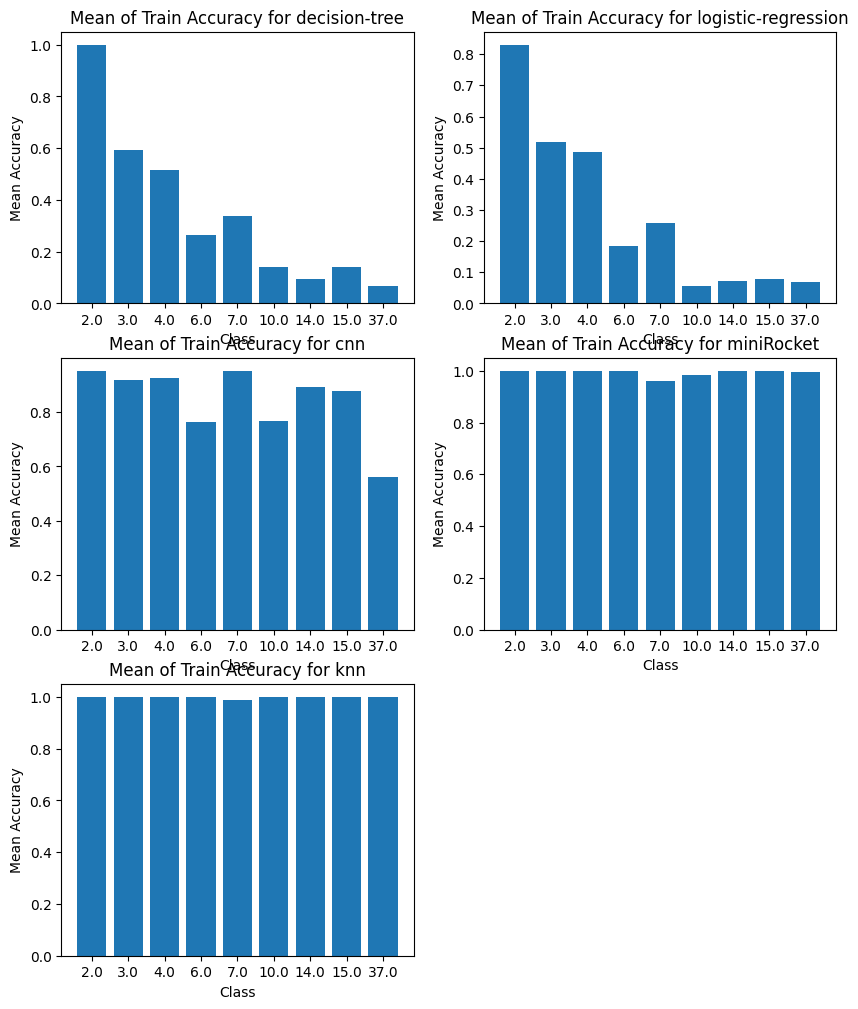

In [164]:
models = models_class_df["model_type"].unique()
num_cols = 2
num_rows = (len(set(models)) + 1)//2
fig = plt.figure(figsize=(5*num_cols, 4*num_rows))

for i, model in enumerate(models):
    model_data = models_mean_perf_train_per_class[model]
    
    x_values = model_data.index.tolist()
    x_values = [str(value) for value in x_values]
    y_values = model_data.values.tolist()

    ax = fig.add_subplot(num_rows, num_cols, i+1)
    
    ax.bar(x_values, y_values)
    ax.set_title(f'Mean of Train Accuracy for {model}')
    ax.set_xlabel('Class')
    ax.set_ylabel('Mean Accuracy')

plt.show()

#### Validation Accuracy

In [165]:
models_mean_perf_val_per_class = models_class_df
models_mean_perf_val_per_class = models_mean_perf_val_per_class.groupby(["model_type", "class"])["val_acc"].mean()

models_perf_dict = {
    model: models_mean_perf_val_per_class[model]
    for model in models_mean_perf_val_per_class.index.get_level_values(0).unique()
}

/tmp/ipykernel_6208/2199870571.py:32: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


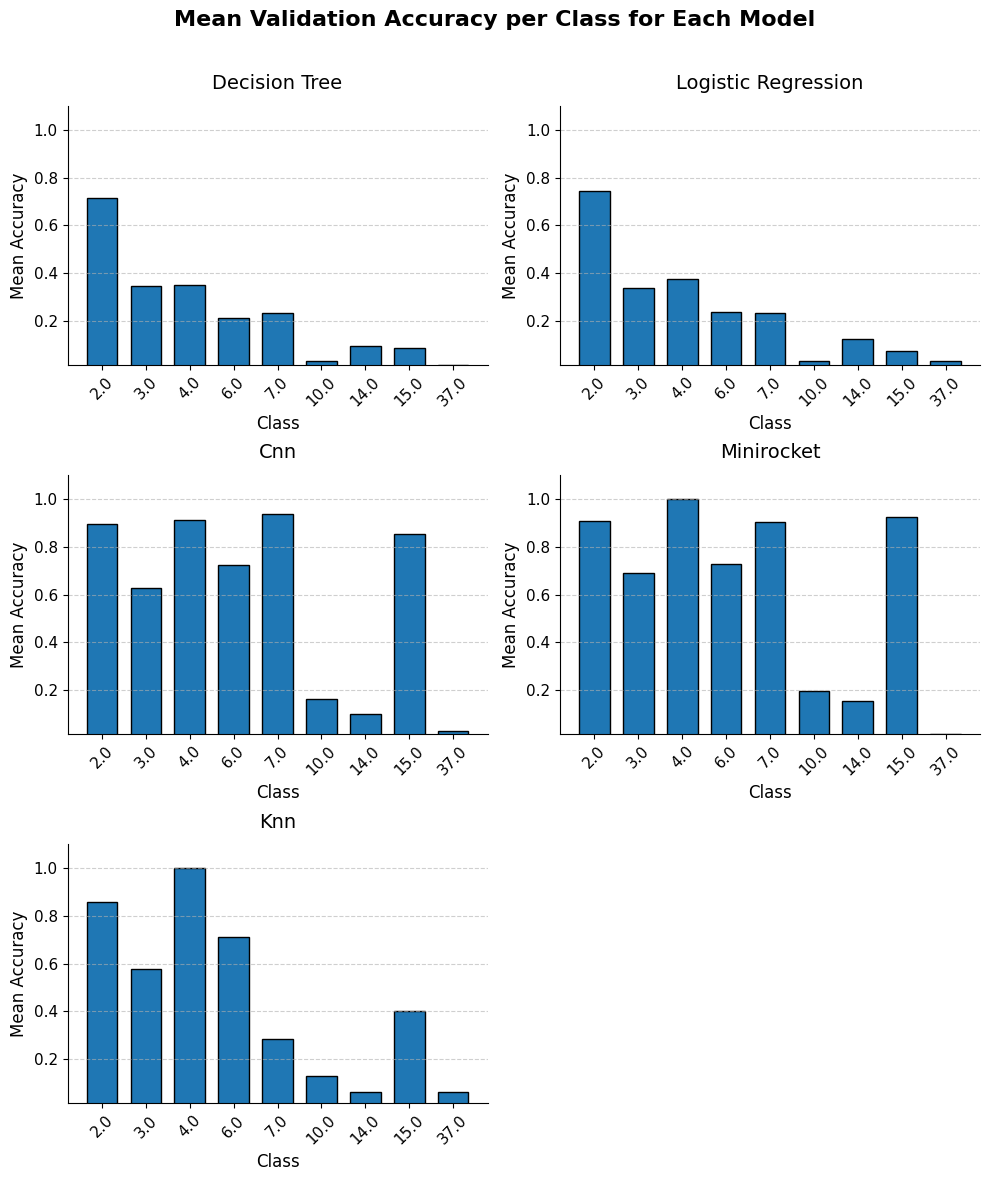

In [166]:
models = models_class_df["model_type"].unique()
num_cols = 2
num_rows = (len(set(models)) + 1) // 2
fig, axs = plt.subplots(num_rows, num_cols, figsize=(5*num_cols, 4*num_rows), constrained_layout=True)

axs = axs.flatten()

y_min = min(np.min(ser.values) for ser in models_perf_dict.values())
y_max = max(np.max(ser.values) for ser in models_perf_dict.values())

for i, model in enumerate(models):
    model_data = models_mean_perf_val_per_class[model]    
    x_values = [str(val) for val in model_data.index.tolist()]
    y_values = model_data.values.tolist()
    
    ax = axs[i]
    bars = ax.bar(x_values, y_values, color='C0', edgecolor='black', width=0.7)
    ax.set_title(f'{model.replace("-", " ").title()}', fontsize=14, pad=12)
    ax.set_xlabel('Class', fontsize=12)
    ax.set_ylabel('Mean Accuracy', fontsize=12)
    ax.set_ylim(y_min, y_max * 1.10)
    ax.grid(True, axis='y', linestyle='--', alpha=0.6)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(axis='x', rotation=45, labelsize=11)
    ax.tick_params(axis='y', labelsize=11)

for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

fig.suptitle('Mean Validation Accuracy per Class for Each Model', fontsize=16, weight='bold')
plt.tight_layout()
plt.subplots_adjust(top=0.90)  
plt.show()


## MiniRocket

In [185]:
results_minirocket = results.query('model == "miniRocket"')
results_minirocket.loc[:,'comp@loy=0.8'] = results_minirocket['comp@loy=0.8'].astype(float)
results_minirocket.loc[:,'num_segm@loy=0.8'] = results_minirocket['num_segm@loy=0.8'].astype(float)
print(results_minirocket['simp_algorithm'].unique())

['OS' 'RDP' 'VW' 'BU']


#### Sum AULC

In [186]:
os_alg_sum_minirocket = results_minirocket.query('simp_algorithm == "OS"')["performance"].sum()
rdp_alg_sum_minirocket = results_minirocket.query('simp_algorithm == "RDP"')["performance"].sum()
bu_alg_sum_minirocket = results_minirocket.query('simp_algorithm == "BU"')["performance"].sum()
#bu_2_alg_sum_minirocket = results_minirocket.query('simp_algorithm == "BU_2"')["performance"].sum()
vw_alg_sum_minirocket = results_minirocket.query('simp_algorithm == "VW"')["performance"].sum()
print("Sum of AULC per algorithm")
print("OS: ", os_alg_sum_minirocket)
print("RDP: ", rdp_alg_sum_minirocket)
print("BU: ", bu_alg_sum_minirocket)
#print("BU_2: ", bu_2_alg_sum_minirocket)
print("VW: ", vw_alg_sum_minirocket)

Sum of AULC per algorithm
OS:  34.742388622258034
RDP:  33.803842801766926
BU:  31.064610019209077
VW:  33.144833831156845


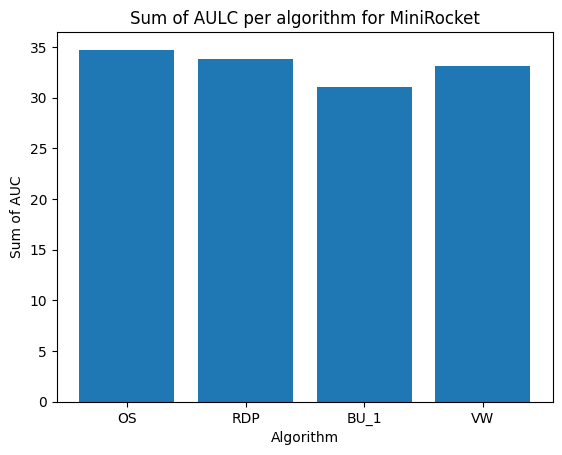

In [187]:
#sum_auc = [os_alg_sum_minirocket, rdp_alg_sum_minirocket, bu_alg_sum_minirocket, bu_2_alg_sum_minirocket, vw_alg_sum_minirocket]
#plt.bar(['OS', 'RDP', 'BU_1', 'BU_2', 'VW'],sum_auc)
sum_auc = [os_alg_sum_minirocket, rdp_alg_sum_minirocket, bu_alg_sum_minirocket, vw_alg_sum_minirocket]
plt.bar(['OS', 'RDP', 'BU_1', 'VW'],sum_auc)
plt.title('Sum of AULC per algorithm for MiniRocket')
plt.xlabel('Algorithm')
plt.ylabel('Sum of AUC')
plt.show()

#### Mean AULC

In [189]:
os_alg_mean_minirocket = results_minirocket.query('simp_algorithm == "OS"')["performance"].mean()
rdp_alg_mean_minirocket = results_minirocket.query('simp_algorithm == "RDP"')["performance"].mean()
bu_alg_mean_minirocket = results_minirocket.query('simp_algorithm == "BU"')["performance"].mean()
#bu_2_alg_mean_minirocket = results_minirocket.query('simp_algorithm == "BU_2"')["performance"].mean()
vw_alg_mean_minirocket = results_minirocket.query('simp_algorithm == "VW"')["performance"].mean()
print("Mean of AUC per algorithm")
print("OS: ", os_alg_mean_minirocket)
print("RDP: ", rdp_alg_mean_minirocket)
print("BU_1: ", bu_alg_mean_minirocket)
#print("BU_2: ", bu_2_alg_mean_minirocket)
print("VW: ", vw_alg_mean_minirocket)

Mean of AUC per algorithm
OS:  0.8908304774937957
RDP:  0.8667652000453058
BU_1:  0.796528462031002
VW:  0.8498675341322268


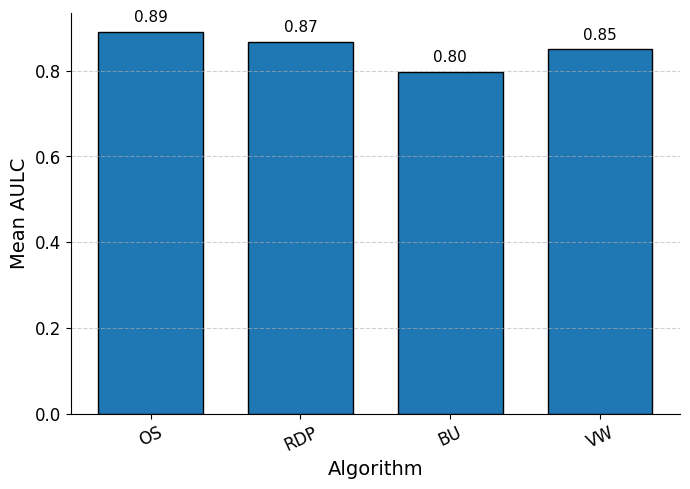

In [190]:
#mean_auc_minirocket = [os_alg_mean_minirocket, rdp_alg_mean_minirocket, bu_2_alg_mean_minirocket, vw_alg_mean_minirocket, bu_alg_mean_minirocket]
mean_auc_minirocket = [os_alg_mean_minirocket, rdp_alg_mean_minirocket, bu_alg_mean_minirocket, vw_alg_mean_minirocket]
#alg_labels = ['OS', 'RDP', 'BU', 'VW', 'GAP_BU']
alg_labels = ['OS', 'RDP', 'BU', 'VW']

#bar_colors = ['C0', 'C0', 'C0', 'C0', 'C7']  
bar_colors = ['C0', 'C0', 'C0', 'C0']  

fig, ax = plt.subplots(figsize=(7, 5))

bars = ax.bar(
    alg_labels,
    mean_auc_minirocket,
    color=bar_colors,
    edgecolor='black',
    width=0.7,
)

ax.set_xlabel('Algorithm', fontsize=14)
ax.set_ylabel('Mean AULC', fontsize=14)

ax.tick_params(axis='x', rotation=25, labelsize=12)
ax.tick_params(axis='y', labelsize=12)

ax.grid(axis='y', linestyle='--', alpha=0.6)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

for bar in bars:
    height = bar.get_height()
    ax.annotate(f"{height:.2f}", 
                xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0, 5), textcoords="offset points",
                ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.savefig("../plots/mean_auc_miniRocket.png")  
plt.show()

By Loyalty Threshold

In [ ]:
os_alg_mean_minirocket_comp = np.array(results_minirocket.query('simp_algorithm == "OS"')["comp@loy=0.8"], dtype=np.float64).mean()
rdp_alg_mean_minirocket_comp = np.array(results_minirocket.query('simp_algorithm == "RDP"')["comp@loy=0.8"], dtype=np.float64).mean()
bu_alg_mean_minirocket_comp = np.array(results_minirocket.query('simp_algorithm == "BU"')["comp@loy=0.8"], dtype=np.float64).mean()
#bu_2_alg_mean_minirocket_comp = np.array(results_minirocket.query('simp_algorithm == "BU_2"')["comp@loy=0.8"], dtype=np.float64).mean()
vw_alg_mean_minirocket_comp = np.array(results_minirocket.query('simp_algorithm == "VW"')["comp@loy=0.8"], dtype=np.float64).mean()
print("Mean Complexity at Loyalty 0.8 per algorithm")
print("OS: ", os_alg_mean_minirocket_comp)
print("RDP: ", rdp_alg_mean_minirocket_comp)
print("BU: ", bu_alg_mean_minirocket_comp)
#print("BU_2: ", bu_2_alg_mean_minirocket_comp)
print("VW: ", vw_alg_mean_minirocket_comp)

Mean Complexity at Loyalty 0.8 per algorithm
OS:  0.13545453186259487
RDP:  0.1583495233959343
BU_1:  0.22486241690489536
VW:  0.15427741820347488


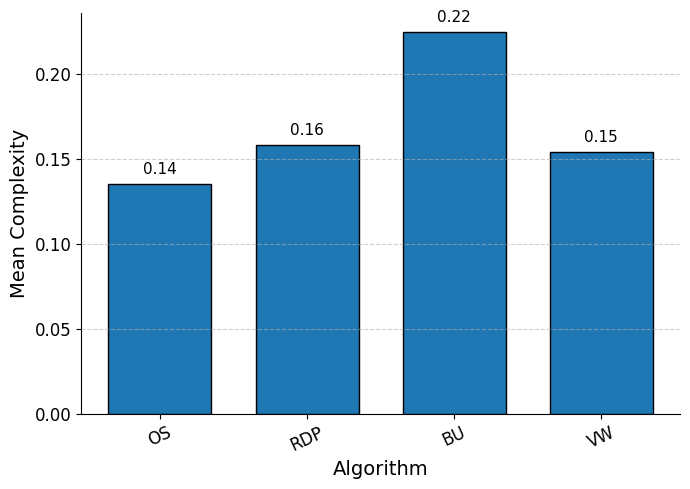

In [192]:
#mean_comp_minirocket = [os_alg_mean_minirocket_comp, rdp_alg_mean_minirocket_comp, bu_alg_mean_minirocket_comp, bu_2_alg_mean_minirocket_comp,vw_alg_mean_minirocket_comp]
mean_comp_minirocket = [os_alg_mean_minirocket_comp, rdp_alg_mean_minirocket_comp, bu_alg_mean_minirocket_comp, vw_alg_mean_minirocket_comp]
alg_labels = ['OS', 'RDP', 'BU', 'VW']

bar_colors = ['C0', 'C0', 'C0', 'C0']  

fig, ax = plt.subplots(figsize=(7, 5))

bars = ax.bar(
    alg_labels,
    mean_comp_minirocket,
    color=bar_colors,
    edgecolor='black',
    width=0.7,
)

ax.set_xlabel('Algorithm', fontsize=14)
ax.set_ylabel('Mean Complexity', fontsize=14)

ax.tick_params(axis='x', rotation=25, labelsize=12)
ax.tick_params(axis='y', labelsize=12)

ax.grid(axis='y', linestyle='--', alpha=0.6)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

for bar in bars:
    height = bar.get_height()
    ax.annotate(f"{height:.2f}", 
                xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0, 5), textcoords="offset points",
                ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()

In [193]:
os_alg_mean_minirocket_num_seg = np.array(results_minirocket.query('simp_algorithm == "OS"')["num_segm@loy=0.8"], dtype=np.float64).mean()
rdp_alg_mean_minirocket_num_seg = np.array(results_minirocket.query('simp_algorithm == "RDP"')["num_segm@loy=0.8"], dtype=np.float64).mean()
bu_alg_mean_minirocket_num_seg = np.array(results_minirocket.query('simp_algorithm == "BU"')["num_segm@loy=0.8"], dtype=np.float64).mean()
#bu_2_alg_mean_minirocket_num_seg = np.array(results_minirocket.query('simp_algorithm == "BU_2"')["num_segm@loy=0.8"], dtype=np.float64).mean()
vw_alg_mean_minirocket_num_seg = np.array(results_minirocket.query('simp_algorithm == "VW"')["num_segm@loy=0.8"], dtype=np.float64).mean()
print("Mean Number Segments at Loyalty 0.8 per algorithm")
print("OS: ", os_alg_mean_minirocket_num_seg)
print("RDP: ", rdp_alg_mean_minirocket_num_seg)
print("BU_1: ", bu_alg_mean_minirocket_num_seg)
#print("BU_2: ", bu_2_alg_mean_minirocket_num_seg)
print("VW: ", vw_alg_mean_minirocket_num_seg)

Mean Number Segments at Loyalty 0.8 per algorithm
OS:  nan
RDP:  nan
BU_1:  nan
VW:  nan


### By Class:

In [194]:
results_minirocket_class = results_minirocket
results_minirocket_class["class"] = results_minirocket_class["dataset"].map(dataset_class_dict)
#print(results_minirocket_class.head(5))

/tmp/ipykernel_6208/2831525357.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_minirocket_class["class"] = results_minirocket_class["dataset"].map(dataset_class_dict)


#### AULC Per Alg and Class

In [195]:
results_minirocket_alg_class = results_minirocket_class.groupby(["simp_algorithm", "class"])["class"].count()
#print(results_minirocket_alg_class)

In [196]:
results_minirocket_alg_class_mean = results_minirocket_class.groupby(["simp_algorithm", "class"])["performance"].mean()
#print(results_minirocket_alg_class_mean)
results_minirocket_alg_class_std = results_minirocket_class.groupby(["simp_algorithm", "class"])["performance"].std()
#print(results_minirocket_alg_class_std)


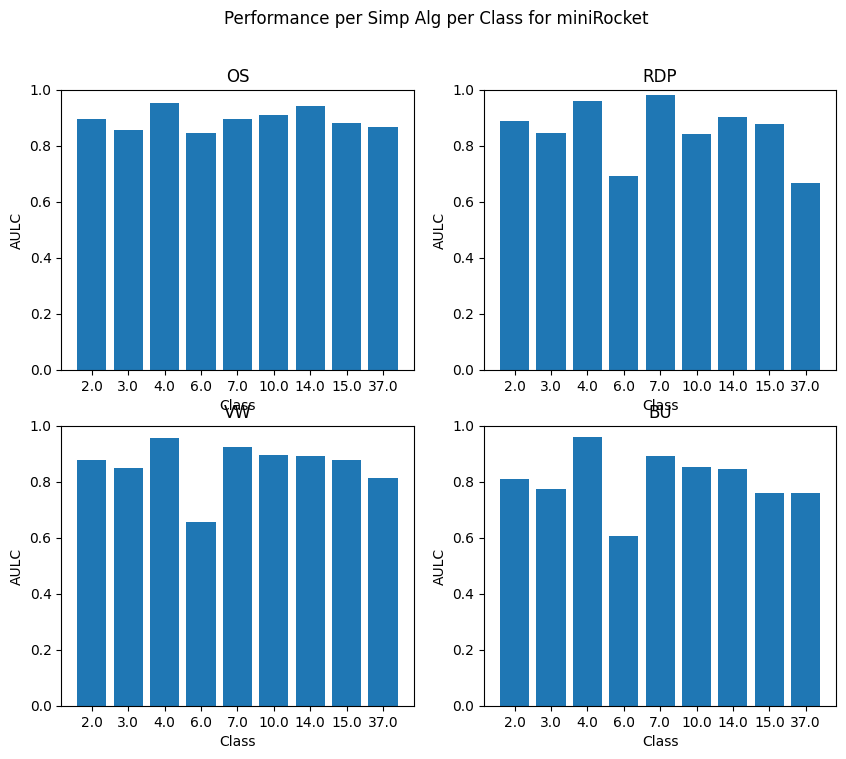

In [197]:
simp_algs = results_minirocket_class["simp_algorithm"].unique()
num_cols = 2
num_rows = (len(set(simp_algs)) + 1)//2
fig = plt.figure(figsize=(5*num_cols, 4*num_rows))

for i, alg in enumerate(simp_algs):
    simp_alg_data = results_minirocket_alg_class_mean[alg]
    
    x_values = simp_alg_data.index.tolist()
    x_values = [str(value) for value in x_values]
    y_values = simp_alg_data.values.tolist()

    ax = fig.add_subplot(num_rows, num_cols, i+1)
    
    ax.bar(x_values, y_values)
    
    ax.set_title(f'{alg}')
    ax.set_xlabel('Class')
    ax.set_ylabel('AULC')
    ax.set_ylim(0.0, 1.0)

plt.suptitle("Performance per Simp Alg per Class for miniRocket")
plt.show()

Binary vs Multicalss

In [198]:
results_minirocket_class["class_type"] = results_minirocket_class["class"].copy().apply(lambda x: 'binary' if x == 2 else "multiclass")
results_minirocket_alg_bin_vs_mc_mean = results_minirocket_class.groupby(["simp_algorithm", "class_type"])["performance"].mean()
print(results_minirocket_alg_bin_vs_mc_mean)

simp_algorithm  class_type
BU              binary        0.811062
                multiclass    0.790069
OS              binary        0.896717
                multiclass    0.888214
RDP             binary        0.889821
                multiclass    0.856518
VW              binary        0.877408
                multiclass    0.837627
Name: performance, dtype: float64


/tmp/ipykernel_6208/554117524.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_minirocket_class["class_type"] = results_minirocket_class["class"].copy().apply(lambda x: 'binary' if x == 2 else "multiclass")


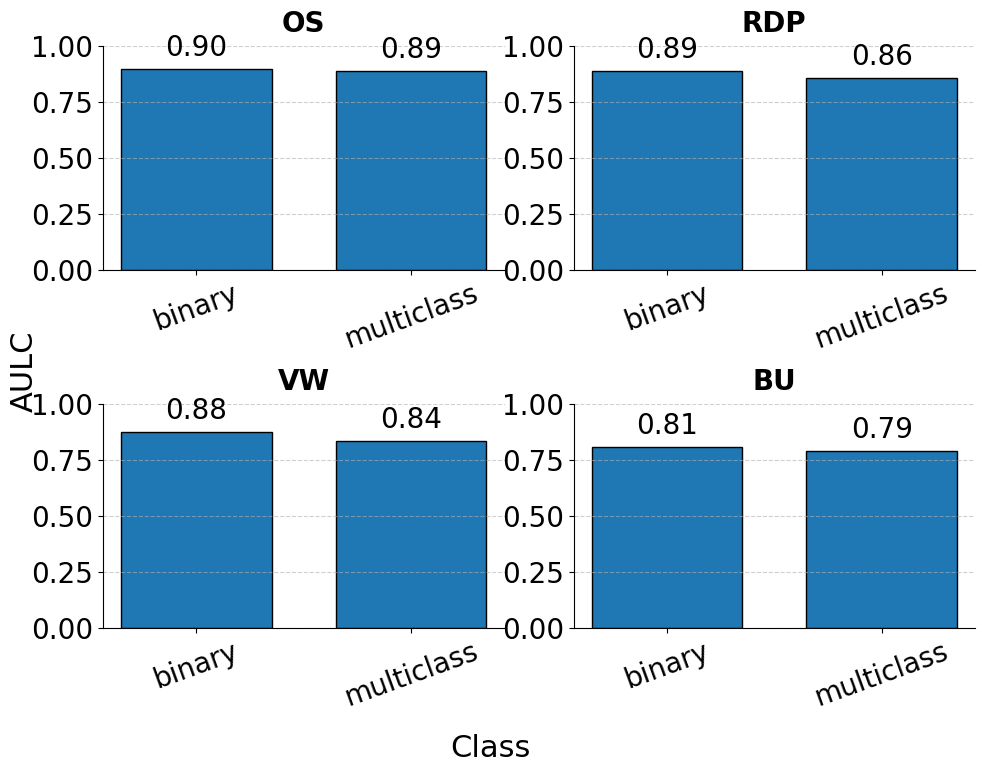

In [199]:

fontsize = 20
#simp_algs = ['OS', 'RDP', 'VW', 'BU_2', 'BU_1']
simp_algs = ['OS', 'RDP', 'VW', 'BU']
num_cols = 2
num_rows = (len(set(simp_algs)) + 1)//2
fig = plt.figure(figsize=(5*num_cols, 4*num_rows))

for i, alg in enumerate(simp_algs):
    simp_alg_data = results_minirocket_alg_bin_vs_mc_mean[alg]
    x_values = [str(value) for value in simp_alg_data.index.tolist()]
    y_values = simp_alg_data.values.tolist()

    ax = fig.add_subplot(num_rows, num_cols, i+1)
    if alg == 'BU_1':
        bars = ax.bar(x_values, y_values, color='C7', edgecolor='black', width=0.7)
    else:
        bars = ax.bar(x_values, y_values, color='C0', edgecolor='black', width=0.7)

    # Set pretty names
    plot_alg = alg
    if alg == 'BU_2':
        plot_alg = 'BU'
    elif alg == 'BU_1':
        plot_alg = 'GAP-BU'

    ax.set_title(f'{plot_alg.upper()}', fontsize=fontsize, fontweight='bold', pad=10)
    ax.set_ylim(0.0, 1.0)
    ax.grid(axis='y', linestyle='--', alpha=0.6)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(axis='x', rotation=20, labelsize=fontsize)
    ax.tick_params(axis='y', labelsize=fontsize)

    for bar in bars:
        height = bar.get_height()
        ax.annotate(
            f"{height:.2f}", 
            xy=(bar.get_x() + bar.get_width() / 2, height),
            xytext=(0, 5), textcoords="offset points",
            ha='center', va='bottom', fontsize=fontsize
        )

# Add common x and y labels to the entire figure
fig.supxlabel('Class', fontsize=fontsize+2)
fig.supylabel('AULC', fontsize=fontsize+2)
# Optionally, add a common title as well:
# fig.suptitle("Performance per Simplification Algorithm per Class for CNN", fontsize=fontsize+4, weight='bold', y=1.01)

plt.tight_layout(rect=[0, 0, 1, 0.97])  # provide space for supxlabel/supylabel (tweak as needed)
plt.savefig("../plots/mean_auc_per_class_minirocket.png")
plt.show()

By Loyalty Threshold

In [200]:
results_minirocket_alg_bin_vs_mc_mean_comp = (results_minirocket_class.groupby(["simp_algorithm", "class_type"])["comp@loy=0.8"]).mean()
print(results_minirocket_alg_bin_vs_mc_mean_comp)

simp_algorithm  class_type
BU              binary        0.246308
                multiclass    0.215331
OS              binary        0.124753
                multiclass    0.140211
RDP             binary        0.140496
                multiclass    0.166285
VW              binary        0.148457
                multiclass    0.156864
Name: comp@loy=0.8, dtype: object


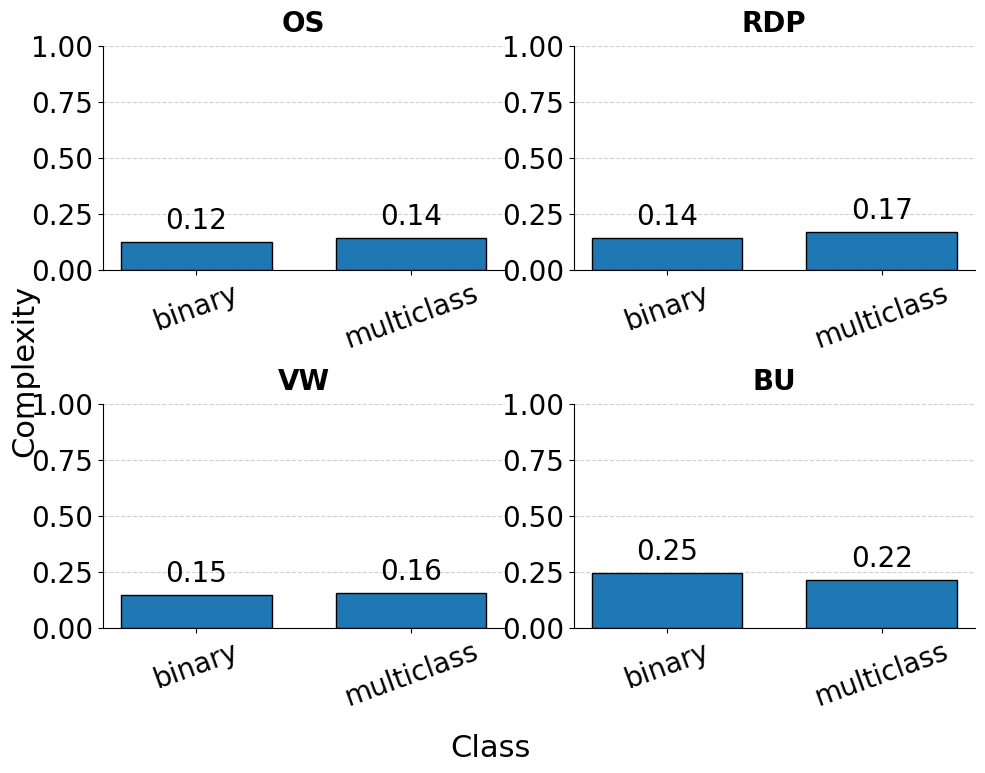

In [201]:

fontsize = 20
simp_algs = ['OS', 'RDP', 'VW', 'BU']
num_cols = 2
num_rows = (len(set(simp_algs)) + 1)//2
fig = plt.figure(figsize=(5*num_cols, 4*num_rows))

for i, alg in enumerate(simp_algs):
    simp_alg_data = results_minirocket_alg_bin_vs_mc_mean_comp[alg]
    x_values = [str(value) for value in simp_alg_data.index.tolist()]
    y_values = simp_alg_data.values.tolist()

    ax = fig.add_subplot(num_rows, num_cols, i+1)
    if alg == 'BU_1':
        bars = ax.bar(x_values, y_values, color='C7', edgecolor='black', width=0.7)
    else:
        bars = ax.bar(x_values, y_values, color='C0', edgecolor='black', width=0.7)

    # Set pretty names
    plot_alg = alg
    if alg == 'BU_2':
        plot_alg = 'BU'
    elif alg == 'BU_1':
        plot_alg = 'GAP-BU'

    ax.set_title(f'{plot_alg.upper()}', fontsize=fontsize, fontweight='bold', pad=10)
    ax.set_ylim(0.0, 1.0)
    ax.grid(axis='y', linestyle='--', alpha=0.6)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(axis='x', rotation=20, labelsize=fontsize)
    ax.tick_params(axis='y', labelsize=fontsize)

    for bar in bars:
        height = bar.get_height()
        ax.annotate(
            f"{height:.2f}", 
            xy=(bar.get_x() + bar.get_width() / 2, height),
            xytext=(0, 5), textcoords="offset points",
            ha='center', va='bottom', fontsize=fontsize
        )

# Add common x and y labels to the entire figure
fig.supxlabel('Class', fontsize=fontsize+2)
fig.supylabel('Complexity', fontsize=fontsize+2)
# Optionally, add a common title as well:
# fig.suptitle("Performance per Simplification Algorithm per Class for minirocket", fontsize=fontsize+4, weight='bold', y=1.01)

plt.tight_layout(rect=[0, 0, 1, 0.97])  # provide space for supxlabel/supylabel (tweak as needed)
plt.savefig("../plots/mean_auc_per_class_minirocket.png")
plt.show()

### By length

In [202]:
dataset_lendth = metadata[["dataset", "Length"]].to_dict()
dataset_length_dict = pd.Series(metadata["Length"].values, index=metadata["dataset"].values).to_dict()
#print(dataset_length_dict)
#models_df["class"] = models_df["dataset"].map()

In [203]:
results_minirocket_length = results_minirocket
results_minirocket_length["length"] = results_minirocket_length["dataset"].map(dataset_length_dict).copy()
#print(results_minirocket_length.head(5))

/tmp/ipykernel_6208/819530652.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_minirocket_length["length"] = results_minirocket_length["dataset"].map(dataset_length_dict).copy()


In [204]:
results_minirocket_alg_length_mean = results_minirocket_length.groupby(["simp_algorithm", "length"])["performance"].mean()

print(results_minirocket_alg_length_mean)

simp_algorithm  length
BU              15.0      0.677470
                24.0      0.788772
                70.0      0.690786
                80.0      0.680688
                82.0      0.889268
                96.0      0.876909
                99.0      0.852120
                128.0     0.851669
                131.0     0.846412
                150.0     0.946921
                176.0     0.758785
OS              15.0      0.758704
                24.0      0.860879
                70.0      0.863837
                80.0      0.843917
                82.0      0.928300
                96.0      0.921097
                99.0      0.910891
                128.0     0.897503
                131.0     0.941262
                150.0     0.971108
                176.0     0.867161
RDP             15.0      0.647111
                24.0      0.860811
                70.0      0.855990
                80.0      0.789178
                82.0      0.925501
                96.0      0.9576

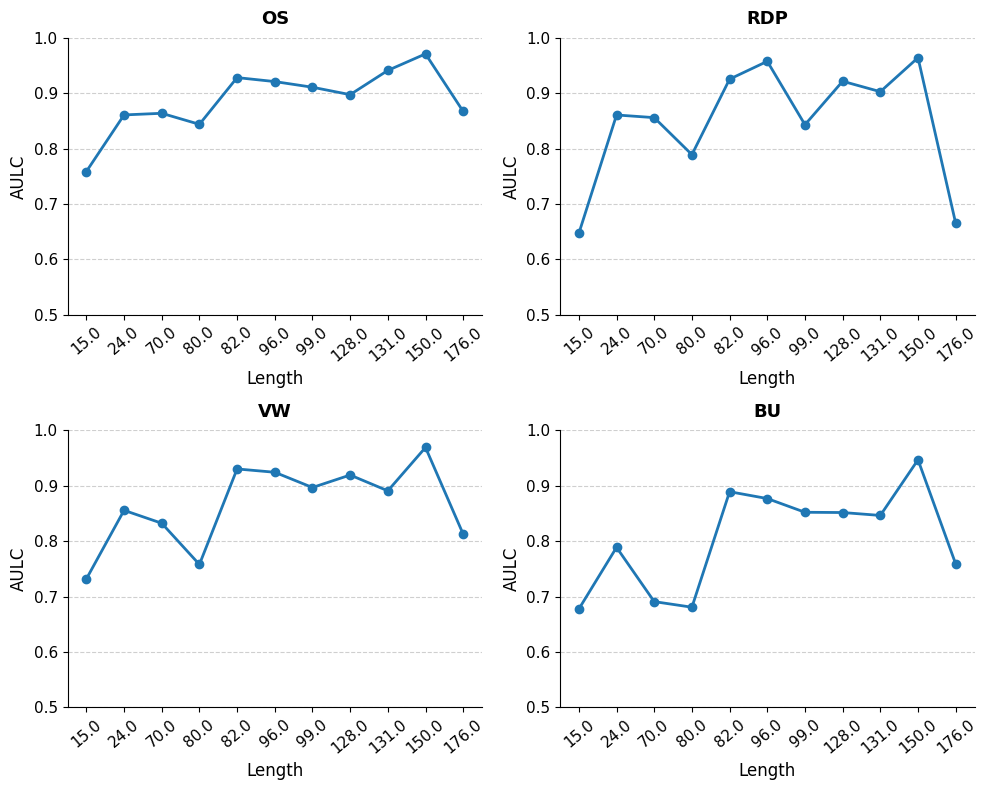

In [205]:
#simp_algs = results_cnn_class["simp_algorithm"].unique()
simp_algs = ['OS', 'RDP', 'VW', 'BU']

num_cols = 2
num_rows = (len(set(simp_algs)) + 1)//2
fig = plt.figure(figsize=(5*num_cols, 4*num_rows))

for i, alg in enumerate(simp_algs):
    simp_alg_data = results_minirocket_alg_length_mean[alg]
    x_values = [str(value) for value in simp_alg_data.index.tolist()]
    y_values = simp_alg_data.values.tolist()

    ax = fig.add_subplot(num_rows, num_cols, i+1)
    if alg == 'BU_1':
        ax.plot(x_values, y_values, marker='o', color='C7', linewidth=2)
    else:
        ax.plot(x_values, y_values, marker='o', color='C0', linewidth=2)

    if alg == 'BU_2':
        alg = 'BU'
    elif alg == 'BU_1':
        alg = 'GAP-BU'

    ax.set_title(f'{alg.upper()}', fontsize=13, fontweight='bold', pad=10)
    ax.set_xlabel('Length', fontsize=12)
    ax.set_ylabel('AULC', fontsize=12)
    ax.set_ylim(0.5, 1.0)
    
    
    ax.tick_params(axis='x', rotation=40, labelsize=11)
    ax.tick_params(axis='y', labelsize=11)
    ax.grid(axis='y', linestyle='--', alpha=0.6)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    #for x, y in zip(x_values, y_values):
    #    ax.annotate(f"{y:.2f}", (x, y), textcoords="offset points", xytext=(0,8),ha='center', fontsize=10)

#fig.suptitle("Performance per Simplification Algorithm per Length for CNN", fontsize=16, weight='bold', y=1.02)
plt.tight_layout()
plt.savefig("../plots/mean_auc_length_minirocket.png")
plt.show()

By Loyalty Threshold

In [206]:
results_minirocket_alg_length_mean_comp = results_minirocket_length.groupby(["simp_algorithm", "length"])["comp@loy=0.8"].mean()

print(results_minirocket_alg_length_mean_comp)

simp_algorithm  length
BU              15.0      0.483195
                24.0        0.2219
                70.0      0.425563
                80.0      0.365343
                82.0      0.144086
                96.0      0.130288
                99.0      0.116346
                128.0     0.177119
                131.0     0.147974
                150.0      0.06497
                176.0     0.228785
OS              15.0      0.347521
                24.0      0.147116
                70.0      0.201162
                80.0      0.194166
                82.0      0.082441
                96.0      0.057446
                99.0      0.108026
                128.0     0.125052
                131.0     0.082236
                150.0     0.036759
                176.0     0.120537
RDP             15.0       0.44425
                24.0       0.18293
                70.0      0.168553
                80.0      0.217752
                82.0      0.096903
                96.0      0.0392

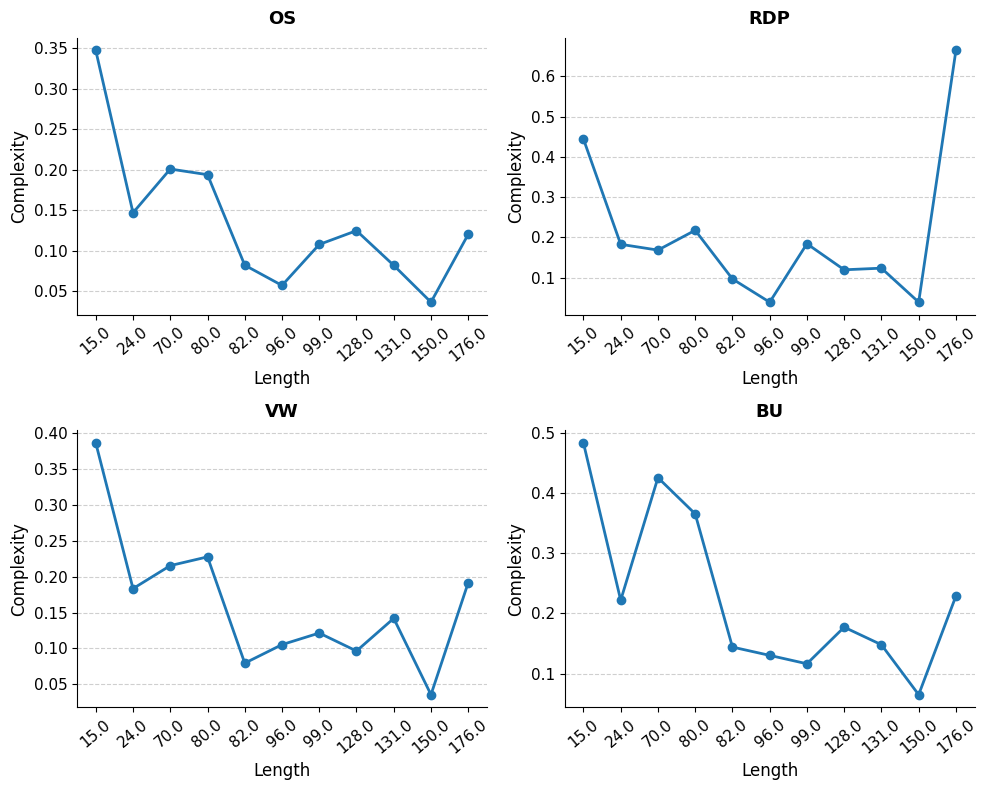

In [207]:
#simp_algs = results_cnn_class["simp_algorithm"].unique()
simp_algs = ['OS', 'RDP', 'VW','BU']

num_cols = 2
num_rows = (len(set(simp_algs)) + 1)//2
fig = plt.figure(figsize=(5*num_cols, 4*num_rows))

for i, alg in enumerate(simp_algs):
    simp_alg_data = results_minirocket_alg_length_mean_comp[alg]
    x_values = [str(value) for value in simp_alg_data.index.tolist()]
    y_values = simp_alg_data.values.tolist()

    ax = fig.add_subplot(num_rows, num_cols, i+1)
    if alg == 'BU_1':
        ax.plot(x_values, y_values, marker='o', color='C7', linewidth=2)
    else:
        ax.plot(x_values, y_values, marker='o', color='C0', linewidth=2)

    if alg == 'BU_2':
        alg = 'BU'
    elif alg == 'BU_1':
        alg = 'GAP-BU'

    ax.set_title(f'{alg.upper()}', fontsize=13, fontweight='bold', pad=10)
    ax.set_xlabel('Length', fontsize=12)
    ax.set_ylabel('Complexity', fontsize=12)
    #ax.set_ylim(0.5, 1.0)
    
    
    ax.tick_params(axis='x', rotation=40, labelsize=11)
    ax.tick_params(axis='y', labelsize=11)
    ax.grid(axis='y', linestyle='--', alpha=0.6)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    #for x, y in zip(x_values, y_values):
    #    ax.annotate(f"{y:.2f}", (x, y), textcoords="offset points", xytext=(0,8),ha='center', fontsize=10)

#fig.suptitle("Performance per Simplification Algorithm per Length for CNN", fontsize=16, weight='bold', y=1.02)
plt.tight_layout()
plt.show()

### By Stationarity

In [208]:
dataset_stat = metadata[["dataset", "Stationary"]].to_dict()
dataset_stat_dict = pd.Series(metadata["Stationary"].values, index=metadata["dataset"].values).to_dict()
results_minirocket_stat = results_minirocket
results_minirocket_stat["stationary"] = results_minirocket_stat["dataset"].map(dataset_stat_dict).copy()

results_minirocket_alg_stat_mean = results_minirocket_stat.groupby(["simp_algorithm", "stationary"])["performance"].mean()

/tmp/ipykernel_6208/64242921.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_minirocket_stat["stationary"] = results_minirocket_stat["dataset"].map(dataset_stat_dict).copy()


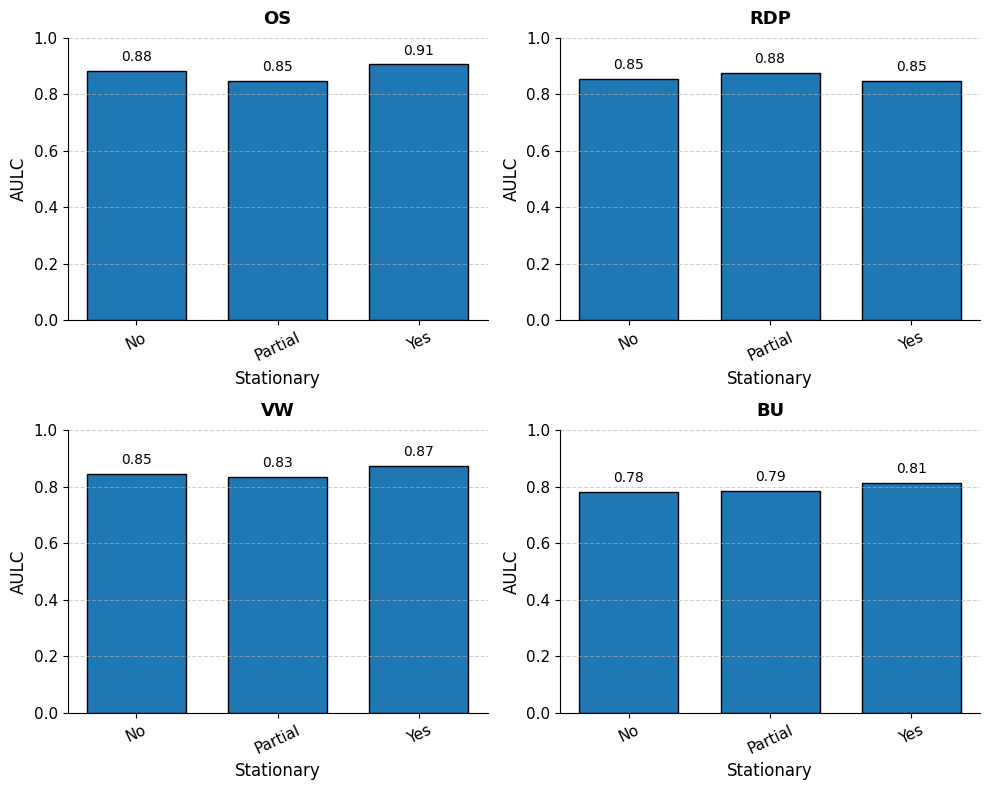

In [209]:
#simp_algs = results_cnn_class["simp_algorithm"].unique()
simp_algs = ['OS', 'RDP', 'VW', 'BU']

num_cols = 2
num_rows = (len(set(simp_algs)) + 1)//2
fig = plt.figure(figsize=(5*num_cols, 4*num_rows))

for i, alg in enumerate(simp_algs):
    simp_alg_data = results_minirocket_alg_stat_mean[alg]
    x_values = [str(value) for value in simp_alg_data.index.tolist()]
    x_values = ['Yes' if x.lower() == 'true' else 'No' if x.lower() == 'false' else x for x in x_values]
    y_values = simp_alg_data.values.tolist()

    ax = fig.add_subplot(num_rows, num_cols, i+1)
    if alg == 'BU_1':
        bars = ax.bar(x_values, y_values, color='C7', edgecolor='black', width=0.7)
    else:
        bars = ax.bar(x_values, y_values, color='C0', edgecolor='black', width=0.7)

    if alg == 'BU_2':
        alg = 'BU'
    elif alg == 'BU_1':
        alg = 'GAP-BU'

    ax.set_title(f'{alg.upper()}', fontsize=13, fontweight='bold', pad=10)
    ax.set_xlabel('Stationary', fontsize=12)
    ax.set_ylabel('AULC', fontsize=12)
    ax.set_ylim(0.0, 1.0)
    ax.tick_params(axis='x', rotation=25, labelsize=11)
    ax.tick_params(axis='y', labelsize=11)
    ax.grid(axis='y', linestyle='--', alpha=0.6)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Annotate bars
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f"{height:.2f}", 
                    xy=(bar.get_x() + bar.get_width()/2, height),
                    xytext=(0, 5), textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)
        
plt.tight_layout()
plt.savefig("../plots/mean_auc_stationary_minirocket.png")
plt.show()

By Loyalty Threshold

In [210]:
results_minirocket_alg_stat_mean_comp = results_minirocket_stat.groupby(["simp_algorithm", "stationary"])["comp@loy=0.8"].mean()

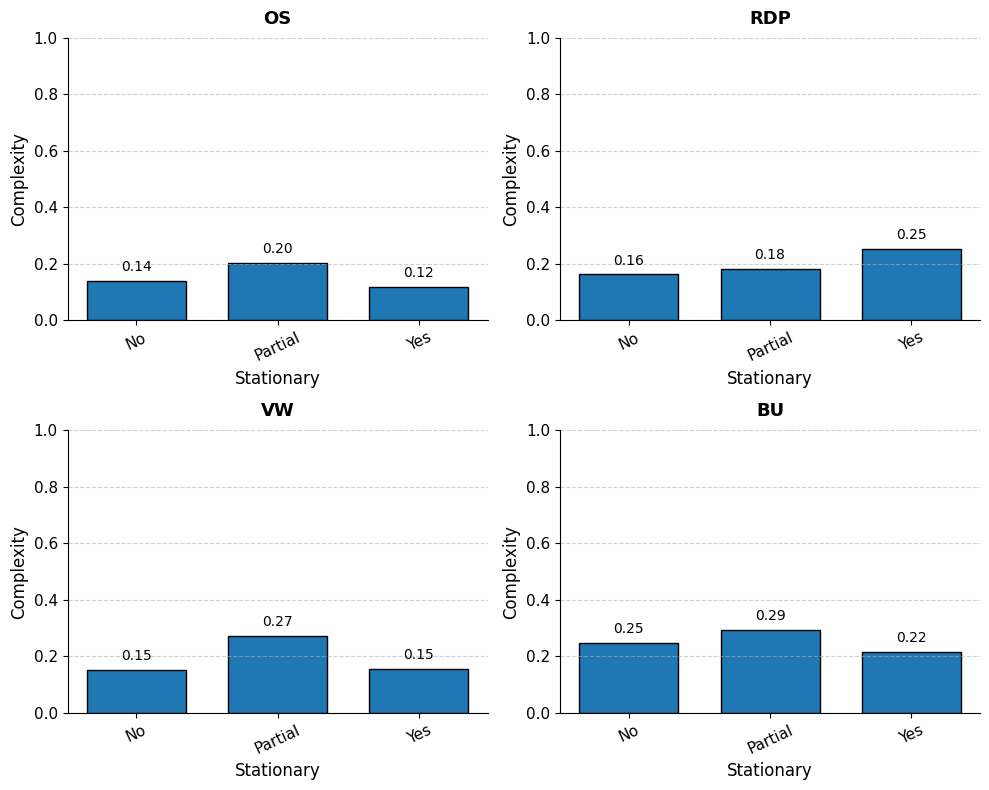

In [211]:
#simp_algs = results_minirocket_class["simp_algorithm"].unique()
simp_algs = ['OS', 'RDP', 'VW', 'BU']

num_cols = 2
num_rows = (len(set(simp_algs)) + 1)//2
fig = plt.figure(figsize=(5*num_cols, 4*num_rows))

for i, alg in enumerate(simp_algs):
    simp_alg_data = results_minirocket_alg_stat_mean_comp[alg]
    x_values = [str(value) for value in simp_alg_data.index.tolist()]
    x_values = ['Yes' if x.lower() == 'true' else 'No' if x.lower() == 'false' else x for x in x_values]
    y_values = simp_alg_data.values.tolist()

    ax = fig.add_subplot(num_rows, num_cols, i+1)
    if alg == 'BU_1':
        bars = ax.bar(x_values, y_values, color='C7', edgecolor='black', width=0.7)
    else:
        bars = ax.bar(x_values, y_values, color='C0', edgecolor='black', width=0.7)

    if alg == 'BU_2':
        alg = 'BU'
    elif alg == 'BU_1':
        alg = 'GAP-BU'

    ax.set_title(f'{alg.upper()}', fontsize=13, fontweight='bold', pad=10)
    ax.set_xlabel('Stationary', fontsize=12)
    ax.set_ylabel('Complexity', fontsize=12)
    ax.set_ylim(0.0, 1.0)
    ax.tick_params(axis='x', rotation=25, labelsize=11)
    ax.tick_params(axis='y', labelsize=11)
    ax.grid(axis='y', linestyle='--', alpha=0.6)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Annotate bars
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f"{height:.2f}", 
                    xy=(bar.get_x() + bar.get_width()/2, height),
                    xytext=(0, 5), textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)
        
plt.tight_layout()
plt.savefig("../plots/mean_auc_stationary_minirocket.png")
plt.show()

### By Seasonality

In [212]:
dataset_season = metadata[["dataset", "Seasonal"]].to_dict()
dataset_season_dict = pd.Series(metadata["Seasonal"].values, index=metadata["dataset"].values).to_dict()
results_minirocket_season = results_minirocket
results_minirocket_season["seasonal"] = results_minirocket_season["dataset"].map(dataset_season_dict).copy()

results_minirocket_alg_season_mean = results_minirocket_season.groupby(["simp_algorithm", "seasonal"])["performance"].mean()

/tmp/ipykernel_6208/581459350.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_minirocket_season["seasonal"] = results_minirocket_season["dataset"].map(dataset_season_dict).copy()


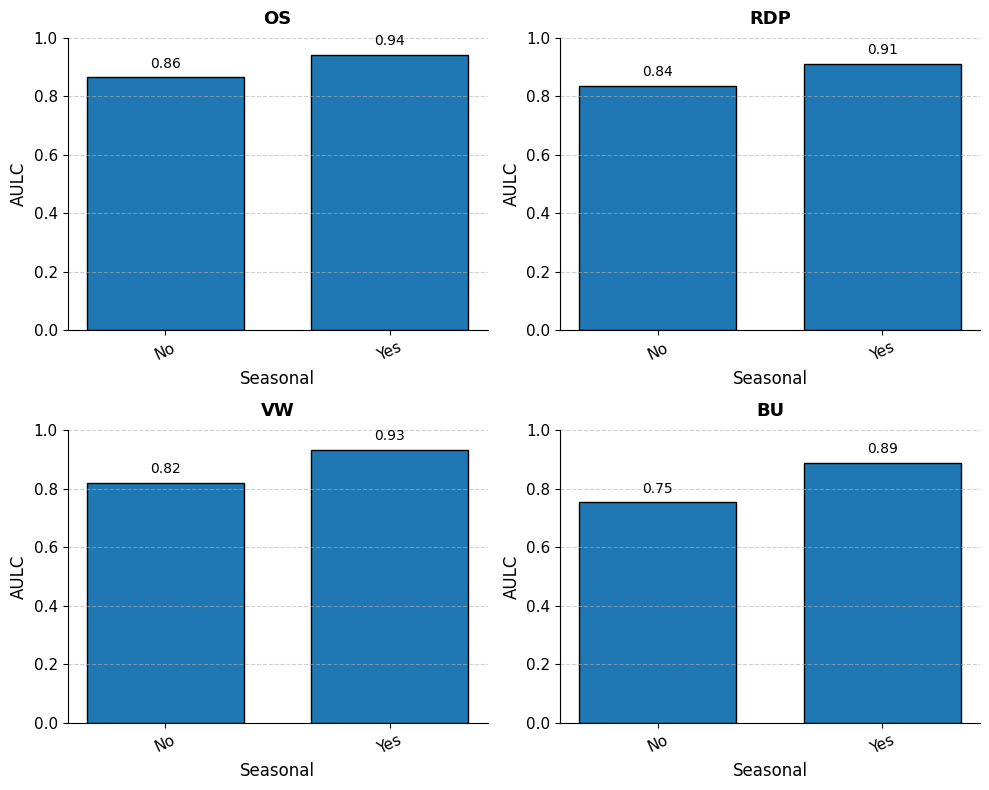

In [213]:
#simp_algs = results_minirocket_class["simp_algorithm"].unique()
simp_algs = ['OS', 'RDP', 'VW', 'BU']

num_cols = 2
num_rows = (len(set(simp_algs)) + 1)//2
fig = plt.figure(figsize=(5*num_cols, 4*num_rows))

for i, alg in enumerate(simp_algs):
    simp_alg_data = results_minirocket_alg_season_mean[alg]
    
    x_values = [str(value) for value in simp_alg_data.index.tolist()]
    x_values = ['Yes' if x.lower() == 'true' 
                else 'No' if x.lower() == 'false' 
                else x.title() for x in x_values]

    y_values = simp_alg_data.values.tolist()

    ax = fig.add_subplot(num_rows, num_cols, i+1)
    if alg == 'BU_1':
        bars = ax.bar(x_values, y_values, color='C7', edgecolor='black', width=0.7)
    else:
        bars = ax.bar(x_values, y_values, color='C0', edgecolor='black', width=0.7)

    if alg == 'BU_2':
        alg = 'BU'
    elif alg == 'BU_1':
        alg = 'GAP-BU'

    ax.set_title(f'{alg.upper()}', fontsize=13, fontweight='bold', pad=10)
    ax.set_xlabel('Seasonal', fontsize=12)
    ax.set_ylabel('AULC', fontsize=12)
    ax.set_ylim(0.0, 1.0)
    ax.tick_params(axis='x', rotation=25, labelsize=11)
    ax.tick_params(axis='y', labelsize=11)
    ax.grid(axis='y', linestyle='--', alpha=0.6)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Annotate bars with values
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f"{height:.2f}", 
                    xy=(bar.get_x() + bar.get_width()/2, height),
                    xytext=(0, 5), textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig("../plots/mean_auc_seasonality_minirocket.png")
plt.show()


By Loyalty Threshold

In [214]:
results_minirocket_alg_season_mean_comp = results_minirocket_season.groupby(["simp_algorithm", "seasonal"])["comp@loy=0.8"].mean()

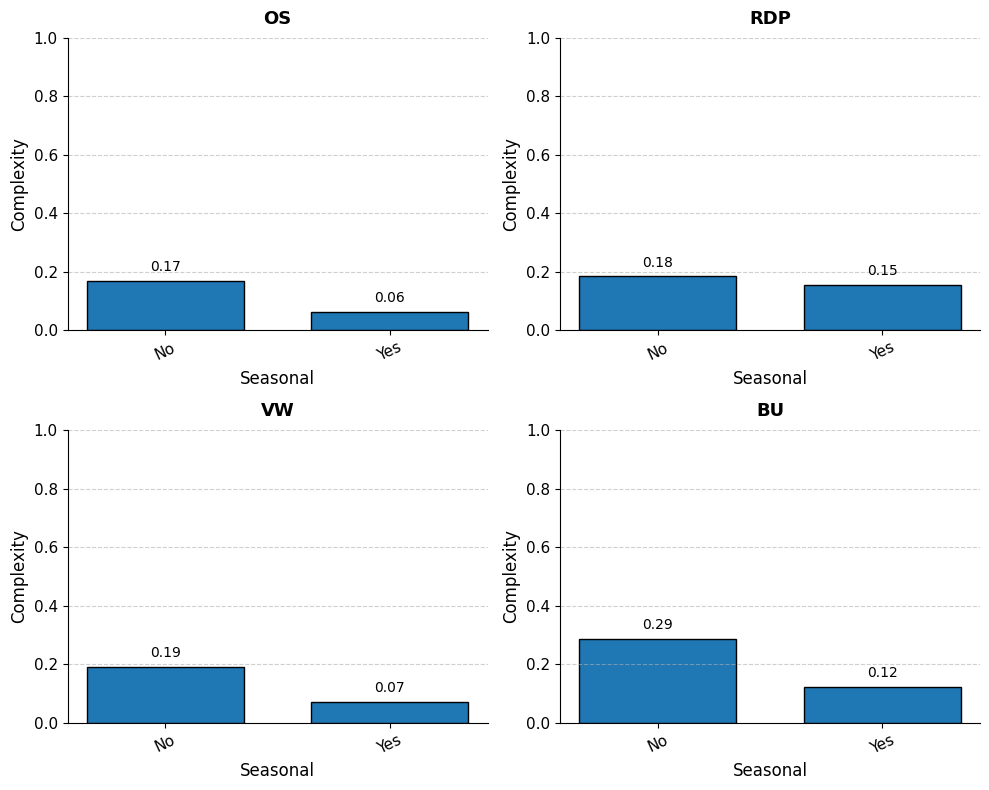

In [215]:
#simp_algs = results_cnn_class["simp_algorithm"].unique()
simp_algs = ['OS', 'RDP', 'VW', 'BU']

num_cols = 2
num_rows = (len(set(simp_algs)) + 1)//2
fig = plt.figure(figsize=(5*num_cols, 4*num_rows))

for i, alg in enumerate(simp_algs):
    simp_alg_data = results_minirocket_alg_season_mean_comp[alg]
    
    x_values = [str(value) for value in simp_alg_data.index.tolist()]
    x_values = ['Yes' if x.lower() == 'true' 
                else 'No' if x.lower() == 'false' 
                else x.title() for x in x_values]

    y_values = simp_alg_data.values.tolist()

    ax = fig.add_subplot(num_rows, num_cols, i+1)
    if alg == 'BU_1':
        bars = ax.bar(x_values, y_values, color='C7', edgecolor='black', width=0.7)
    else:
        bars = ax.bar(x_values, y_values, color='C0', edgecolor='black', width=0.7)

    if alg == 'BU_2':
        alg = 'BU'
    elif alg == 'BU_1':
        alg = 'GAP-BU'

    ax.set_title(f'{alg.upper()}', fontsize=13, fontweight='bold', pad=10)
    ax.set_xlabel('Seasonal', fontsize=12)
    ax.set_ylabel('Complexity', fontsize=12)
    ax.set_ylim(0.0, 1.0)
    ax.tick_params(axis='x', rotation=25, labelsize=11)
    ax.tick_params(axis='y', labelsize=11)
    ax.grid(axis='y', linestyle='--', alpha=0.6)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Annotate bars with values
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f"{height:.2f}", 
                    xy=(bar.get_x() + bar.get_width()/2, height),
                    xytext=(0, 5), textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig("../plots/mean_auc_seasonality_minirocket.png")
plt.show()


### By Entropy

In [223]:
metadata["Entropy_bins"], _ = pd.qcut(metadata["Entropy"], q=3, labels=[0,1,2], retbins=True)

In [222]:
_, bins = pd.qcut(metadata["Entropy"], q=3, labels=[0,1,2], retbins=True)
print(bins)

[0.04079289 0.23381681 0.27187529 0.82591962]


In [224]:
metadata.query("Entropy_bins == 0")

,ID,Type,dataset,Train,Test,Class,Length,ED (w=0),DTW (learned_w),DTW (w=100),Default rate,Stationary,Seasonal,Entropy,Entropy_bins
1,90,Simulated,BME,30,150,3,128,0.1667,0.0200 (4),0.1000,0.6667,False,True,0.116147,0
10,107,Motion,GunPointAgeSpan,135,316,2,150,0.1013,0.0348 (3),0.0823,0.4937,False,True,0.126225,0
11,108,Motion,GunPointMaleVersusFemale,135,316,2,150,0.0253,0.0253 (0),0.0032,0.4747,False,True,0.124931,0
12,109,Motion,GunPointOldVersusYoung,136,315,2,150,0.0476,0.0349 (4),0.1619,0.4762,False,True,0.121894,0
14,44,Image,MedicalImages,381,760,10,99,0.3158,0.2526 (20),0.2632,0.4855,False,False,0.175250,0
15,45,Image,MiddlePhalanxOutlineAgeGroup,400,154,3,80,0.4805,0.4805 (0),0.5000,0.4286,False,False,0.233817,0
20,57,Image,ProximalPhalanxOutlineCorrect,600,291,2,80,0.1924,0.2096 (1),0.2165,0.3162,False,False,0.228385,0
21,58,Image,ProximalPhalanxTW,400,205,6,80,0.2927,0.2439 (2),0.2439,0.6488,False,False,0.227575,0
22,127,Simulated,SmoothSubspace,150,150,3,15,0.0933,0.0533 (1),0.1733,0.6667,False,False,0.040793,0
27,128,Simulated,UMD,36,144,3,150,0.2361,0.0278 (6),0.0069,0.6667,False,True,0.115110,0


In [225]:
dataset_entropy = metadata[["dataset", "Entropy_bins"]].to_dict()
dataset_entropy_dict = pd.Series(metadata["Entropy_bins"].values, index=metadata["dataset"].values).to_dict()
results_minirocket_entropy = results_minirocket
results_minirocket_entropy["entropy"] = results_minirocket_entropy["dataset"].map(dataset_entropy_dict).copy()

results_minirocket_alg_entropy_mean = results_minirocket_entropy.groupby(["simp_algorithm", "entropy"])["performance"].mean()

/tmp/ipykernel_6208/1685653629.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_minirocket_entropy["entropy"] = results_minirocket_entropy["dataset"].map(dataset_entropy_dict).copy()


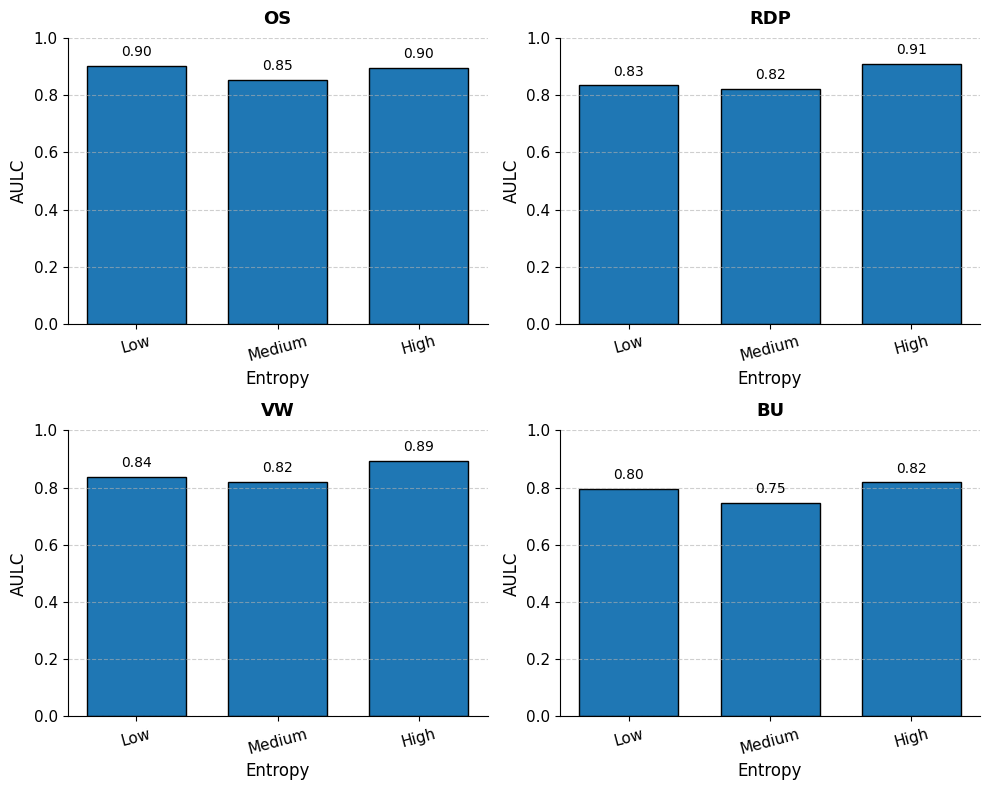

In [226]:
#simp_algs = results_cnn_class["simp_algorithm"].unique()
#simp_algs = ['OS', 'RDP', 'VW', 'BU_1']
simp_algs = ['OS', 'RDP', 'VW', 'BU']

num_cols = 2
num_rows = (len(set(simp_algs)) + 1)//2
fig = plt.figure(figsize=(5*num_cols, 4*num_rows))

entropy_labels = ["Low", "Medium", "High"]

for i, alg in enumerate(simp_algs):
    simp_alg_data = results_minirocket_alg_entropy_mean[alg]
    x_values = list(simp_alg_data.index)
    tick_positions = [int(x) for x in x_values]
    y_values = simp_alg_data.values.tolist()

    ax = fig.add_subplot(num_rows, num_cols, i+1)
    if alg == 'BU_1':
        bars = ax.bar(tick_positions, y_values, color='C7', edgecolor='black', width=0.7)
    else:
        bars = ax.bar(tick_positions, y_values, color='C0', edgecolor='black', width=0.7)

    if alg == 'BU_2':
        alg = 'BU'
    elif alg == 'BU_1':
        alg = 'GAP-BU'

    ax.set_title(f'{alg.upper()}', fontsize=13, fontweight='bold', pad=10)
    ax.set_xlabel('Entropy', fontsize=12)
    ax.set_ylabel('AULC', fontsize=12)
    ax.set_ylim(0.0, 1.0)
    ax.set_xticks(tick_positions)
    ax.set_xticklabels(entropy_labels)
    ax.tick_params(axis='x', labelsize=11, rotation=15)
    ax.tick_params(axis='y', labelsize=11)
    ax.grid(axis='y', linestyle='--', alpha=0.6)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    for bar in bars:
        height = bar.get_height()
        ax.annotate(f"{height:.2f}", 
                    xy=(bar.get_x() + bar.get_width()/2, height),
                    xytext=(0, 5), textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)
        
plt.tight_layout()
plt.savefig("../plots/mean_auc_entropy_minirocket.png")
plt.show()


By Loyalty Threshold

In [227]:
results_minirocket_alg_entropy_mean_comp = results_minirocket_entropy.groupby(["simp_algorithm", "entropy"])["comp@loy=0.8"].mean()

In [ ]:
#simp_algs = results_cnn_class["simp_algorithm"].unique()
simp_algs = ['OS', 'RDP', 'VW', 'BU']

num_cols = 2
num_rows = (len(set(simp_algs)) + 1)//2
fig = plt.figure(figsize=(5*num_cols, 4*num_rows))

entropy_labels = ["Low", "Medium", "High"]

for i, alg in enumerate(simp_algs):
    simp_alg_data = results_minirocket_alg_entropy_mean_comp[alg]
    x_values = list(simp_alg_data.index)
    tick_positions = [int(x) for x in x_values]
    y_values = simp_alg_data.values.tolist()

    ax = fig.add_subplot(num_rows, num_cols, i+1)
    if alg == 'BU_1':
        bars = ax.bar(tick_positions, y_values, color='C7', edgecolor='black', width=0.7)
    else:
        bars = ax.bar(tick_positions, y_values, color='C0', edgecolor='black', width=0.7)

    if alg == 'BU_2':
        alg = 'BU'
    elif alg == 'BU_1':
        alg = 'GAP-BU'

    ax.set_title(f'{alg.upper()}', fontsize=13, fontweight='bold', pad=10)
    ax.set_xlabel('Entropy', fontsize=12)
    ax.set_ylabel('Complexity', fontsize=12)
    ax.set_ylim(0.0, 1.0)
    ax.set_xticks(tick_positions)
    ax.set_xticklabels(entropy_labels)
    ax.tick_params(axis='x', labelsize=11, rotation=15)
    ax.tick_params(axis='y', labelsize=11)
    ax.grid(axis='y', linestyle='--', alpha=0.6)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    for bar in bars:
        height = bar.get_height()
        ax.annotate(f"{height:.2f}", 
                    xy=(bar.get_x() + bar.get_width()/2, height),
                    xytext=(0, 5), textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)
        
plt.tight_layout()
plt.savefig("../plots/mean_auc_entropy_minirocket.png")
plt.show()


### Combined Properties

In [ ]:
results_minirocket_best_case = results_minirocket.query(f"stationary == 'False' & seasonal == True & entropy == 0")
results_minirocket_best_case

In [ ]:
auc_perf = np.array([round(result*100,4) for result in results_minirocket_best_case["performance"].to_list()])
simp_alg = results_minirocket_best_case["simp_algorithm"].unique()
auc_perf = np.array_split(auc_perf, 4)
datasets = results_minirocket_best_case["dataset"].unique()

best_resulting_table = pd.DataFrame(auc_perf, columns=simp_alg, index=datasets)
best_resulting_table.loc["Mean"] = best_resulting_table.select_dtypes(include=['number']).mean()
best_resulting_table

## Overall Tale

In [ ]:
#results_cnn_alg_stat_mean

def dataframe_to_dict(df: pd.DataFrame, cls, add_string:str = "", as_percentage: bool = True) -> dict:
    df_dict = df.to_dict()
    #assert type(list(df_dict.keys())[0][1]) == type(cls), f"cls not matching types {type(list(df_dict.keys())[0][1])}, {type(cls)}"
    if as_percentage:
        cls_dict = {key[0]:round(df_dict[key]*100,2) for key in df_dict if key[1] == cls}
    else:
        cls_dict = {key[0]:round(df_dict[key],2) for key in df_dict if key[1] == cls}
    cls_dict["metric"] = add_string
    return cls_dict

In [ ]:
rows = []
#mean_auc_minirocket= [os_alg_mean_minirocket, rdp_alg_mean_minirocket, bu_alg_mean_minirocket, bu_2_alg_mean_minirocket, vw_alg_mean_minirocket]
mean_auc_minirocket= [os_alg_mean_minirocket, rdp_alg_mean_minirocket, bu_alg_mean_minirocket, vw_alg_mean_minirocket]

mean_auc_minirocket_perc = [value*100 for value in mean_auc_minirocket]
mean = dict(zip(["metric","OS", "RDP", "BU_1", "BU_2", "VW"], ["Mean"]+ mean_auc_minirocket_perc))
rows.append(mean)

class_dict_bin = dataframe_to_dict(results_minirocket_alg_bin_vs_mc_mean, "binary", "Binary")
rows.append(class_dict_bin)
class_dict_mc = dataframe_to_dict(results_minirocket_alg_bin_vs_mc_mean, "multiclass", "Multiclass")
rows.append(class_dict_mc)

stat_dict_true = dataframe_to_dict(results_minirocket_alg_stat_mean, "True", "Stationary")
rows.append(stat_dict_true)
stat_dict_false = dataframe_to_dict(results_minirocket_alg_stat_mean, "False", "Non-Stationary")
rows.append(stat_dict_false)
stat_dict_partial = dataframe_to_dict(results_minirocket_alg_stat_mean, "Partial", "Partially-Stational")
rows.append(stat_dict_partial)

ses_dict_true = dataframe_to_dict(results_minirocket_alg_season_mean, True, "Seasonal")
rows.append(ses_dict_true)
ses_dict_false = dataframe_to_dict(results_minirocket_alg_season_mean, False, "Non-Seasonal")
rows.append(ses_dict_false)

entropy_dict_true = dataframe_to_dict(results_minirocket_alg_entropy_mean, 0, "Low_Entropy")
rows.append(entropy_dict_true)
entropy_dict_false = dataframe_to_dict(results_minirocket_alg_entropy_mean, 1, "Medium_Entropy")
rows.append(entropy_dict_false)
entropy_dict_partial = dataframe_to_dict(results_minirocket_alg_entropy_mean, 2, "High_Entropy")
rows.append(entropy_dict_partial)

pd.set_option('display.precision', 2)

#metrics_df = pd.DataFrame.from_dict(rows).sort_values(by='OS', ascending=False)
metrics_df = pd.DataFrame.from_dict(rows)
metrics_df = metrics_df.set_index('metric')
metrics_df


In [ ]:
rows = []
mean_comp_minirocket_perc = mean_comp_minirocket
#mean_comp_minirocket_perc = [value*100 for value in mean_comp_minirocket]
mean = dict(zip(["metric","OS", "RDP", "BU_1", "BU_2", "VW"], ["Mean"]+ mean_comp_minirocket_perc))
rows.append(mean)


class_dict_bin_comp = dataframe_to_dict(results_minirocket_alg_bin_vs_mc_mean_comp, "binary", "Binary", as_percentage=False)
rows.append(class_dict_bin_comp)
class_dict_mc_comp = dataframe_to_dict(results_minirocket_alg_bin_vs_mc_mean_comp, "multiclass", "Multiclass", as_percentage=False)
rows.append(class_dict_mc_comp)

stat_dict_true_comp = dataframe_to_dict(results_minirocket_alg_stat_mean_comp, "True", "Stationary", as_percentage=False)
rows.append(stat_dict_true_comp)
stat_dict_false_comp = dataframe_to_dict(results_minirocket_alg_stat_mean_comp, "False", "Non-Stationary", as_percentage=False)
rows.append(stat_dict_false_comp)
stat_dict_partial_comp = dataframe_to_dict(results_minirocket_alg_stat_mean_comp, "Partial", "Partially-Stational", as_percentage=False)
rows.append(stat_dict_partial_comp)

ses_dict_true_comp = dataframe_to_dict(results_minirocket_alg_season_mean_comp, True, "Seasonal", as_percentage=False)
rows.append(ses_dict_true_comp)
ses_dict_false_comp = dataframe_to_dict(results_minirocket_alg_season_mean_comp, False, "Non-Seasonal", as_percentage=False)
rows.append(ses_dict_false_comp)

entropy_dict_true_comp = dataframe_to_dict(results_minirocket_alg_entropy_mean_comp, 0, "Low_Entropy", as_percentage=False)
rows.append(entropy_dict_true_comp)
entropy_dict_false_comp = dataframe_to_dict(results_minirocket_alg_entropy_mean_comp, 1, "Medium_Entropy", as_percentage=False)
rows.append(entropy_dict_false_comp)
entropy_dict_partial_comp = dataframe_to_dict(results_minirocket_alg_entropy_mean_comp, 2, "High_Entropy", as_percentage=False)
rows.append(entropy_dict_partial_comp)

#pd.set_option('display.precision', 2)

#metrics_df = pd.DataFrame.from_dict(rows).sort_values(by='OS', ascending=False)
metrics_df = pd.DataFrame.from_dict(rows)
metrics_df = metrics_df.set_index('metric')
metrics_df
